In [1]:
import os
import pandas as pd
import numpy as np
from multiprocessing import Pool
import multiprocessing
from data_loader import data_loader
from tqdm import tqdm
from functools import partial

In [6]:
def data_loader_all(func, path, train, nrows, **kwargs):
    '''
    Parameters:
    
    func: 하나의 csv파일을 읽는 함수 
    path: [str] train용 또는 test용 csv 파일들이 저장되어 있는 폴더 
    train: [boolean] train용 파일들 불러올 시 True, 아니면 False
    nrows: [int] csv 파일에서 불러올 상위 n개의 row 
    lookup_table: [pd.DataFrame] train_label.csv 파일을 저장한 변수 
    event_time: [int] 상태_B 발생 시간 
    normal: [int] 상태_A의 라벨
    
    Return:
    
    combined_df: 병합된 train 또는 test data
    '''
    files_in_dir = os.listdir(path)
    
    files_path = [path+'/'+file for file in files_in_dir]
    
    if train :
        func_fixed = partial(func, nrows = nrows, train = True, lookup_table = kwargs['lookup_table'], event_time = kwargs['event_time'], normal = kwargs['normal'])
        
    else : 
        func_fixed = partial(func, nrows = nrows, train = False)
    
    
    # 여러개의 코어를 활용하여 데이터 읽기 
    if __name__ == '__main__':
        pool = Pool(processes = multiprocessing.cpu_count()) 
        df_list = list(tqdm(pool.imap(func_fixed, files_path), total = len(files_path)))
        pool.close()
        pool.join()
    
    # 데이터 병합하기 
    combined_df = pd.concat(df_list, ignore_index=True)
    
    return combined_df
    
    

In [4]:
train_path = "./data/train"
test_path = "./data/test"
label = pd.read_csv("./data/train_label.csv")
train = data_loader_all(data_loader, path=train_path, train=True, 
                       nrows=100, normal=999, event_time=10, lookup_table=label)

100%|██████████| 828/828 [01:19<00:00, 10.42it/s]


In [4]:
test = data_loader_all(data_loader, path=test_path, train=False, nrows=60)

100%|██████████| 720/720 [00:50<00:00, 14.23it/s]


In [12]:
train.head(10)

,id,time,V0000,V0001,V0002,V0003,V0004,V0005,V0006,V0007,...,V5112,V5113,V5114,V5115,V5116,V5117,V5118,V5119,V5120,label
0,545,0,30.465864,8.769276,8.718136,8.649309,8.666047,209.350624,183.481557,-1.750378e-19,...,1,1,1,60,127.58,112.263,-0.264680,85.4,-0.004474,999
1,545,1,30.469066,8.883353,8.728539,8.763734,8.716318,182.685628,192.419782,1.935626e-19,...,1,1,1,60,0.00,0.000,0.000024,85.4,0.000000,999
2,545,2,30.471939,8.750871,8.733991,8.694832,8.692292,204.660928,166.195751,-2.207702e-19,...,1,1,1,60,0.00,0.000,-0.000011,85.4,0.000000,999
3,545,3,30.457942,8.797687,8.732132,8.729372,8.701479,179.748847,206.193738,-4.594139e-19,...,1,1,1,60,0.00,0.000,-0.000002,85.4,0.000000,999
4,545,4,30.453427,8.686378,8.712109,8.704956,8.687103,190.937355,163.864319,1.856829e-19,...,1,1,1,60,0.00,0.000,-0.000031,85.4,0.000000,999
5,545,5,30.474984,8.825343,8.709057,8.712641,8.715015,189.345794,190.109292,3.132490e-19,...,1,1,1,60,0.00,0.000,-0.000003,85.4,0.000000,999
6,545,6,30.470703,8.777491,8.690715,8.712619,8.712374,184.385638,222.773946,5.214632e-19,...,1,1,1,60,0.00,0.000,-0.000005,85.4,0.000000,999
7,545,7,30.462426,8.687394,8.697832,8.722733,8.732172,185.462961,188.657415,-3.420922e-19,...,1,1,1,60,0.00,0.000,-0.000006,85.4,0.000000,999
8,545,8,30.493205,8.755366,8.700842,8.722217,8.711757,192.912386,187.697436,4.001867e-19,...,1,1,1,60,0.00,0.000,0.000009,85.4,0.000000,999
9,545,9,30.460322,8.679841,8.686697,8.718383,8.683043,205.923431,197.313052,-3.585991e-19,...,1,1,1,60,0.00,0.000,0.000008,85.4,0.000000,999


In [13]:
train.tail(10)

,id,time,V0000,V0001,V0002,V0003,V0004,V0005,V0006,V0007,...,V5112,V5113,V5114,V5115,V5116,V5117,V5118,V5119,V5120,label
82790,548,90,30.463920,8.655340,8.677354,8.687309,8.709169,190.502704,250.361861,3.146989e-19,...,1,1,1,60,0.0,0.0,1.322474e-05,85.4,0.0,21
82791,548,91,30.465905,8.705520,8.723622,8.700976,8.702099,195.400418,186.696194,-1.912314e-19,...,1,1,1,60,0.0,0.0,5.360631e-06,85.4,0.0,21
82792,548,92,30.458149,8.671487,8.725346,8.703216,8.693693,225.010559,174.410486,3.407356e-19,...,1,1,1,60,0.0,0.0,-3.276703e-06,85.4,0.0,21
82793,548,93,30.452527,8.802452,8.686815,8.747724,8.671742,211.693311,272.723690,4.178466e-19,...,1,1,1,60,0.0,0.0,7.893182e-06,85.4,0.0,21
82794,548,94,30.467045,8.757942,8.703211,8.694510,8.682853,214.216480,254.178030,5.918303e-19,...,1,1,1,60,0.0,0.0,9.089611e-07,85.4,0.0,21
82795,548,95,30.484728,8.671523,8.693305,8.739597,8.713562,199.417463,233.000286,-8.062924e-19,...,1,1,1,60,0.0,0.0,1.747951e-05,85.4,0.0,21
82796,548,96,30.472393,8.814420,8.687622,8.709898,8.728637,232.612801,197.675025,-2.410963e-19,...,1,1,1,60,0.0,0.0,-2.271771e-05,85.4,0.0,21
82797,548,97,30.472769,8.725393,8.678891,8.678229,8.689200,215.332668,237.532353,-9.438657e-20,...,1,1,1,60,0.0,0.0,5.654705e-06,85.4,0.0,21
82798,548,98,30.484135,8.719626,8.702743,8.674975,8.682801,214.755569,190.775921,-2.170485e-19,...,1,1,1,60,0.0,0.0,-7.610264e-06,85.4,0.0,21
82799,548,99,30.458061,8.729680,8.708134,8.736163,8.718863,222.726517,154.208363,2.663143e-19,...,1,1,1,60,0.0,0.0,-5.722153e-06,85.4,0.0,21


In [14]:
train.shape

(82800, 5124)

In [26]:
train.describe()

,id,time,V0000,V0001,V0002,V0003,V0004,V0005,V0006,V0007,V0008,V0009,V0010,V0011,V0012,V0013,V0014,V0015,V0016,V0017,V0018,V0025,V0026,V0027,V0028,V0029,V0030,V0031,V0032,V0033,V0040,V0041,V0042,V0043,V0044,V0045,V0046,V0047,V0048,V0049,...,V5005,V5006,V5007,V5008,V5009,V5010,V5011,V5012,V5013,V5014,V5015,V5016,V5017,V5018,V5019,V5020,V5021,V5022,V5023,V5024,V5025,V5074,V5075,V5076,V5077,V5078,V5079,V5080,V5084,V5085,V5086,V5087,V5088,V5089,V5090,V5116,V5117,V5118,V5120,label
count,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,8.280000e+04,82800.000000,82800.000000,82800.000000,8.280000e+04,8.280000e+04,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,...,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,82800.000000,8.280000e+04,82800.000000,82800.000000
mean,413.500000,49.500000,30.304857,8.685028,8.659633,8.650845,8.653157,190.272951,189.734731,1.394066e+01,8.807388,14.458604,9.382300,1.445853e+01,9.382817e+00,268.970524,268.547715,275.538183,275.078386,36.204637,36.219846,18.342865,2.572937,2.565418,36.215543,36.215540,36.217333,36.215469,36.215515,36.217194,18.005366,2.519558,2.274609,18.111676,2.620700,2.275872,14.785188,18.006780,2.231807,2.239265,...,86.090330,85.958932,86.401494,86.401554,86.401462,86.401945,119.917910,119.914508,119.904589,119.906141,179.868002,179.867010,179.835511,43.200017,43.200024,43.200010,43.200010,43.200019,43.200009,43.200028,43.200014,578.556208,42.210547,385.471056,27.880552,550.804276,550.804591,43.200014,110.882804,110.882541,-0.293302,-0.235954,-0.195620,-0.153251,43.199965,1.391700,1.234489,1.363329e+00,-0.000017,188.152174
std,239.024281,28.866244,1.411179,0.935292,0.929270,0.973276,0.973147,47.248264,52.177493,5.889067e+01,47.130024,59.815806,48.630435,5.981582e+01,4.863034e+01,37.765112,37.717512,9.121809,9.198233,4.147750,4.133652,0.113520,0.009881,0.019019,4.133519,4.133492,4.133601,4.133506,4.133530,4.133548,0.052136,0.024299,0.017097,0.039196,0.002926,0.019340,0.042734,0.014093,0.005736,0.002060,...,5.174266,6.167349,0.046160,0.052245,0.047118,0.056985,2.373932,2.461957,2.750886,2.705085,3.793286,3.831951,4.734604,0.000488,0.002735,0.002755,0.000274,0.002761,0.002723,0.002766,0.000393,116.880784,13.401253,78.134158,8.953295,0.382158,0.389594,0.005749,0.110005,0.106987,0.048773,0.008456,0.042124,0.118797,0.005599,13.225114,11.731026,9.729998e+00,0.000889,274.991128
min,0.000000,0.000000,0.000000,4.027708,4.189661,3.693100,3.700223,-52.879274,-88.369326,-1.318431e-01,0.000000,-0.191165,0.000000,-2.570846e-01,-2.827205e-17,-2.973148,-4.770904,265.355180,264.494881,20.514291,20.636324,15.065489,2.288562,2.017749,20.503711,20.528395,20.557344,20.537542,20.530780,20.544539,16.508758,2.041370,1.779895,16.988256,2.537952,2.271050,14.783688,17.679629,2.067188,2.236006,...,-0.059782,-0.069080,86.310605,86.289952,86.291243,86.309241,51.637500,49.038754,40.736254,42.086246,70.653060,69.609370,43.571786,43.200000,43.188082,43.188584,43.200000,43.187940,43.189282,43.186175,43.200000,-50.468388,-33.207797,-33.158714,-15.668496,549.276122,549.211010,43.175900,110.571970,110.618648,-0.333704,-0.271033,-0.316519,-0.221357,43.176846,0.000000,0.000000,-2.647478e-01,-0.004474,0.000000
25%,206.750000,24.750000,30.463846,8.666677,8.690121,8.680818,8.6

## Train Lable Balance

In [23]:
train_label = pd.read_csv('./data/train_label.csv')

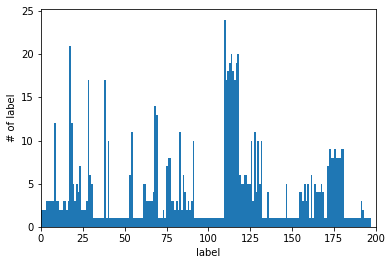

In [24]:
import matplotlib.pyplot as plt

plt.hist(train_label['label'], bins=len(train_label['label'].unique()))
plt.xlim(0, 200)
plt.ylim(bottom=0)
plt.xlabel('label')
plt.ylabel('# of label')
plt.show()

In [25]:
train_label.shape

(828, 2)

### Train data Lable Balance

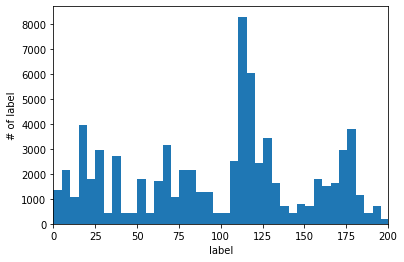

In [28]:
import matplotlib.pyplot as plt

plt.hist(train['label'], bins=len(train['label'].unique()))
plt.xlim(0, 200)
plt.ylim(bottom=0)
plt.xlabel('label')
plt.ylabel('# of label')
plt.show()

### Train, Test data save

In [ ]:
train.to_csv('./data/train.csv', index_label=False)
test.to_csv("./data/test.csv", index_label=False)